In [3]:
import pandas as pd

In [5]:
data=pd.read_csv("Preplacementdata.csv")
data

,Unnamed: 0,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,3,4.0,56.00,52.00,52.00,66.0,59.43,265000.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [20]:
data["hsc_p"].std()

10.89750915750298

In [6]:
import seaborn as sns

C:\Users\MOHANLAL\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


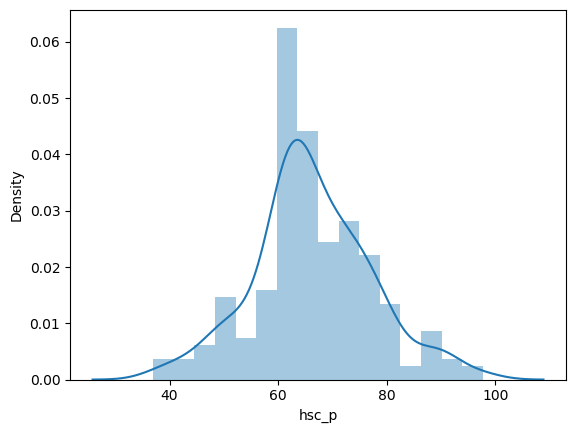

In [11]:
sns.distplot(data["hsc_p"])

In [23]:
def get_pdf_probabitily(data,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(data,kde=True,kde_kws={"color":"Blue"},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # Generate a sample
    sample=data
    #calculuate paramters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f,Standard Deviate=%.3f'%(sample_mean,sample_std))
    #.3 used for digits after decimal points
    #Define distribution
    dist=norm(sample_mean,sample_std)
    #sample propobabilities for a range of outcomes
    values=[value for value in range (startrange,endrange)]
    propobilities=[dist.pdf(value) for value in values]
    prob=sum(propobilities)
    print("The area between the range({},{}):{}".format(startrange,endrange,sum(propobilities)))
    return prob

Mean=66.333,Standard Deviate=10.898
The area between the range(40,50):0.05426082914305822


C:\Users\MOHANLAL\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


0.05426082914305822

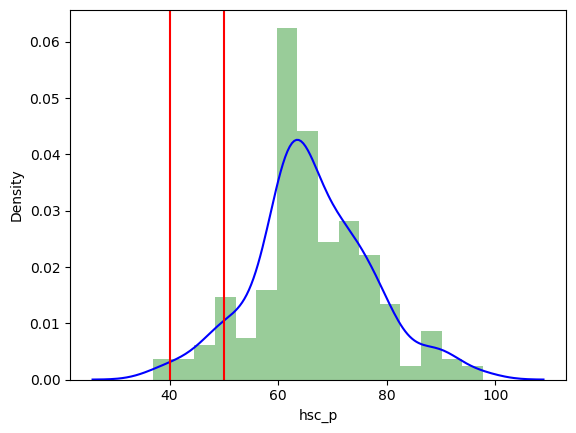

In [24]:
get_pdf_probabitily(data["hsc_p"],40,50)

In [27]:
! pip install statsmodels

In [29]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(data["hsc_p"])
ecdf(78)

0.8697674418604651

# Standard Normal Distribution

In [31]:
def SND(data):
    import seaborn as sns
    mean=data.mean()
    std=data.std()

    values=[i for i in data]

    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score)

C:\Users\MOHANLAL\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == "__main__":


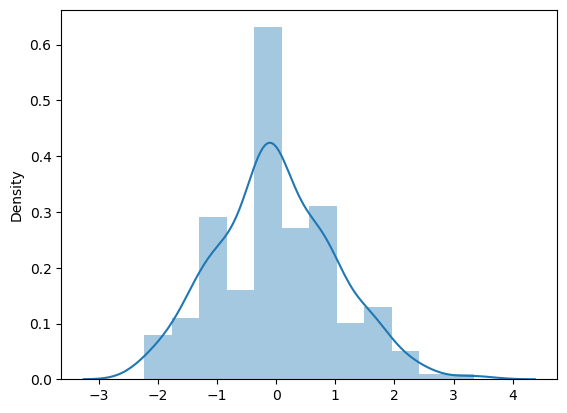

In [34]:
SND(data["degree_p"])